### Support Vector Mechine 

#### Task 1: Exploratory Data Analysis (EDA)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/harik/Data science Assignment/Pharma_Industry.csv")
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [5]:
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

#### 2. Distribution Analysis

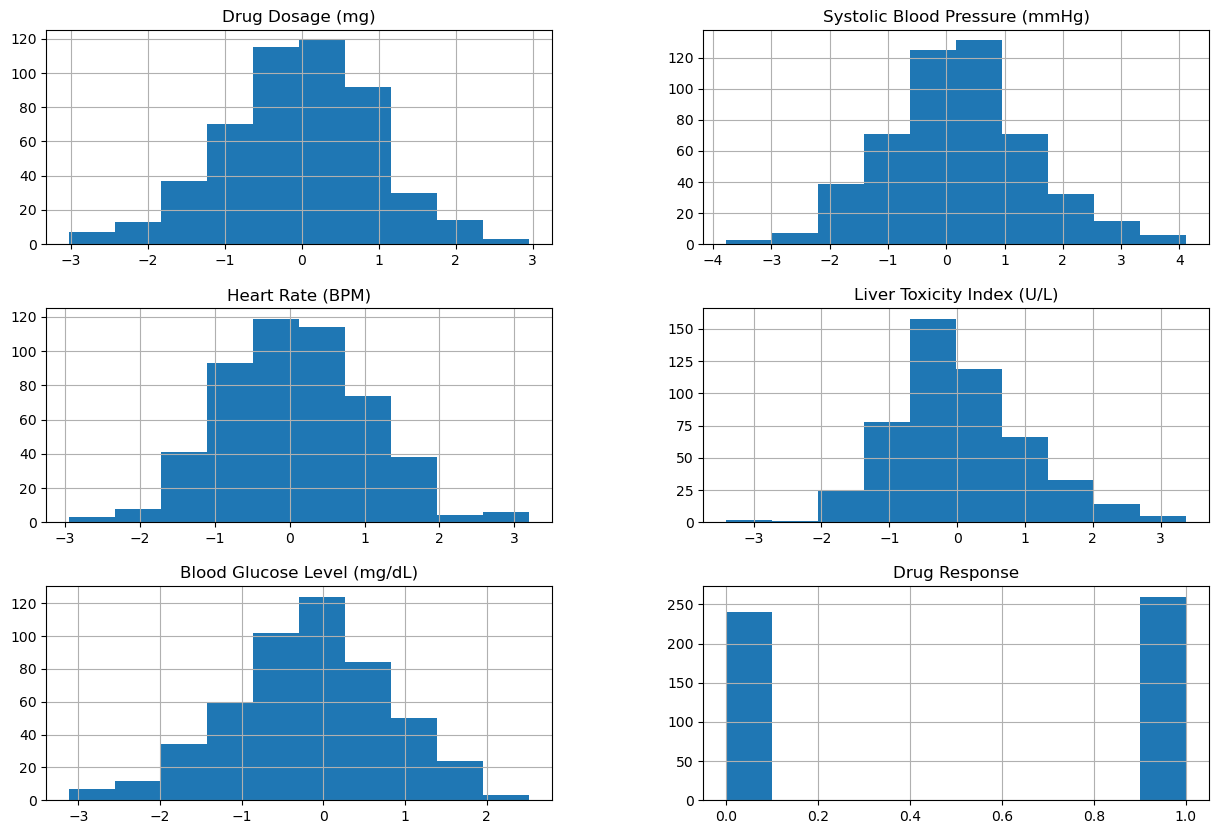

In [7]:
df.hist(figsize=(15,10))
plt.show()

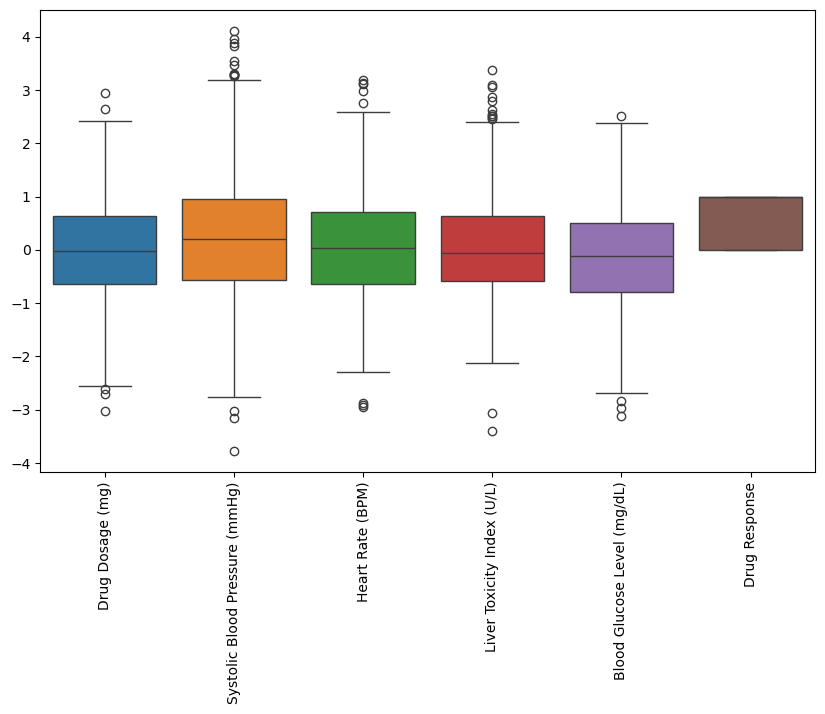

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

#### 3. Feature Correlation

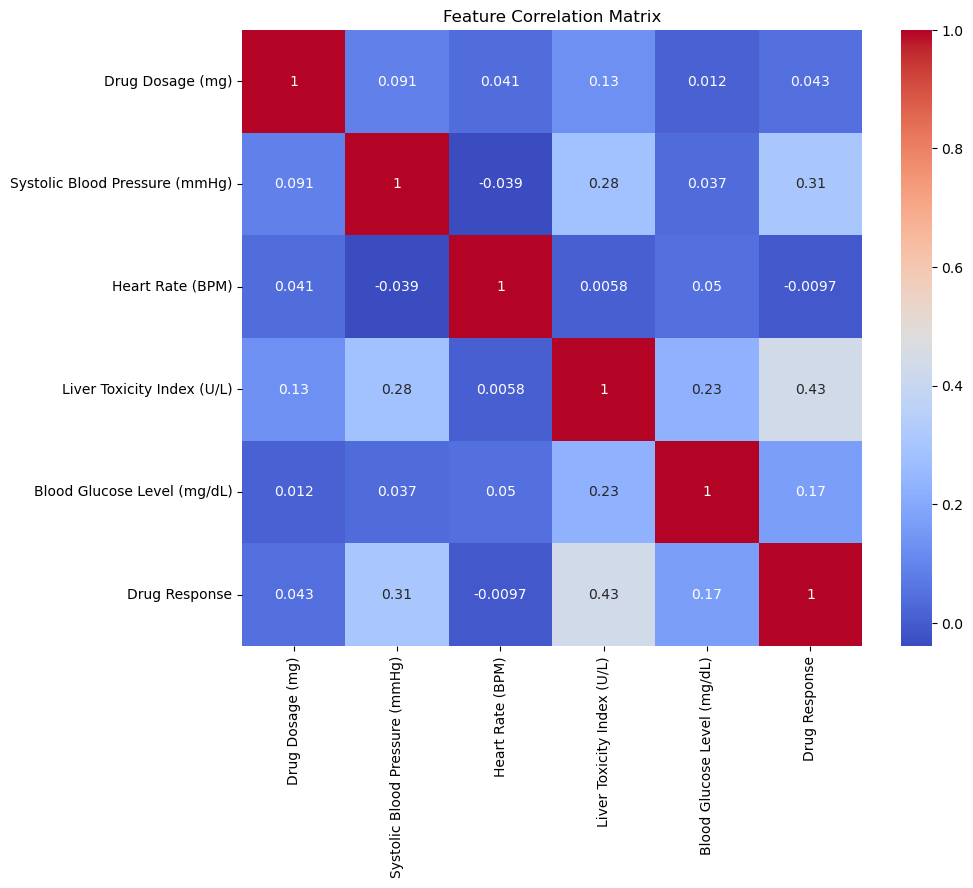

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

#### Task 2: Data Preprocessing
1. Encoding Categorical Variables

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

#### 2. Train–Test Split

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop("Drug Response", axis=1)
y = df["Drug Response"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Task 3: Data Visualization
1. Pair Plot

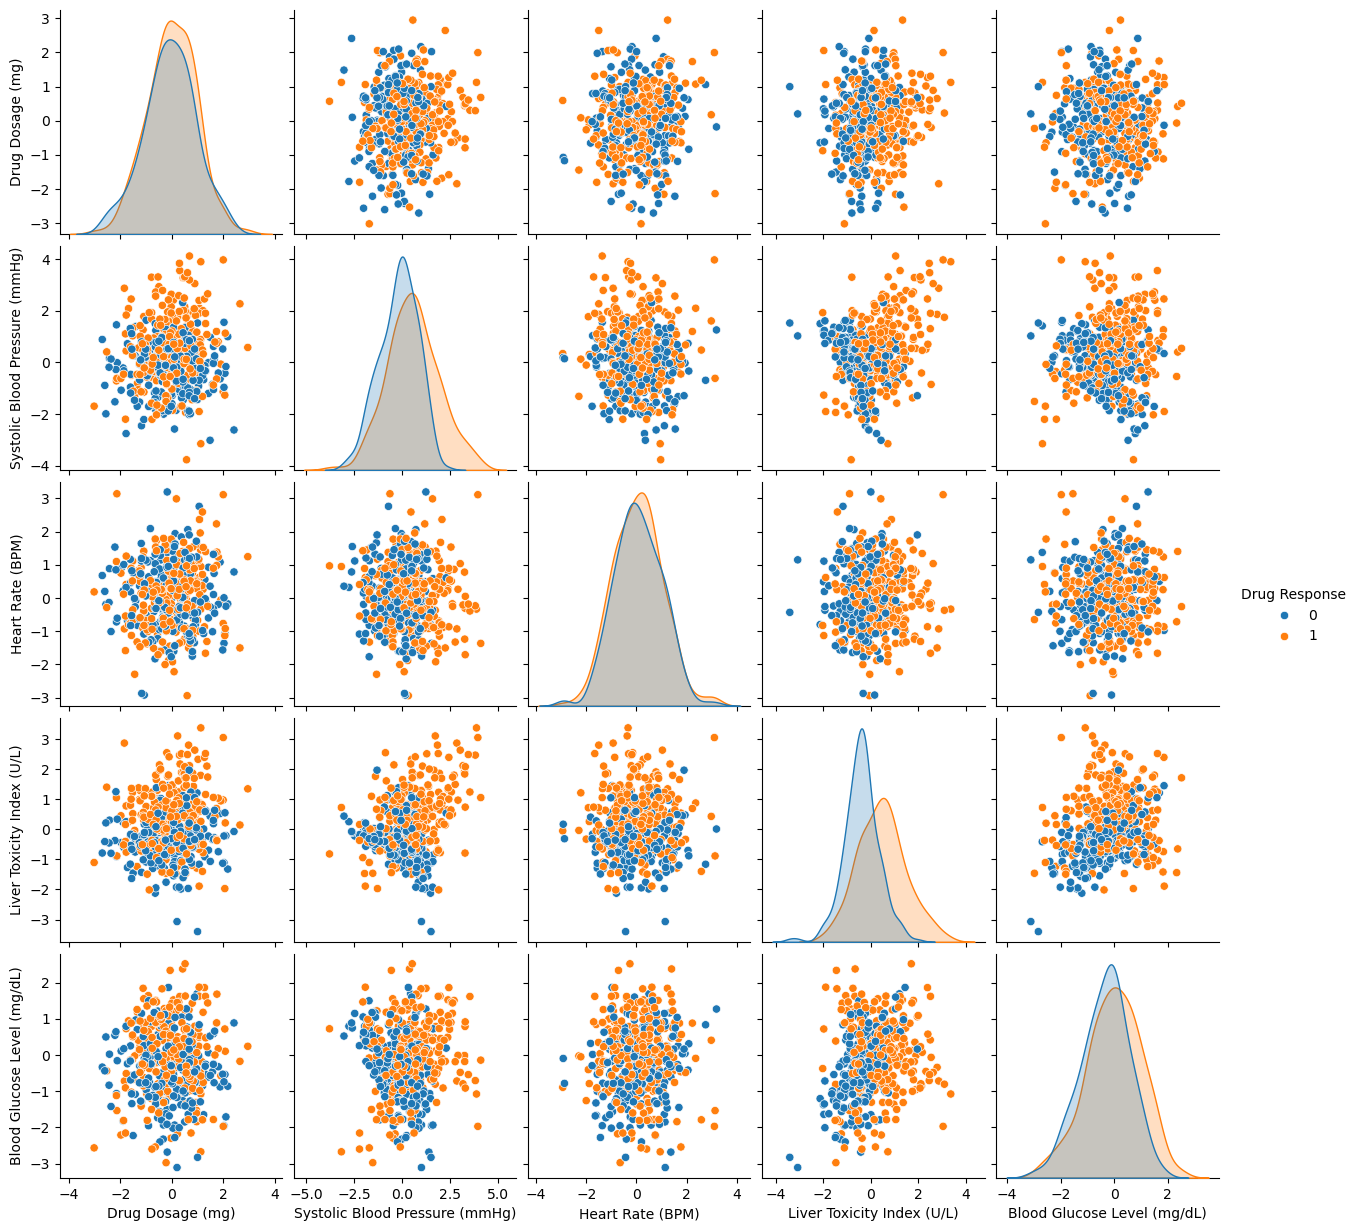

In [13]:
sns.pairplot(df, hue="Drug Response")
plt.show()

#### 2. Class Distribution

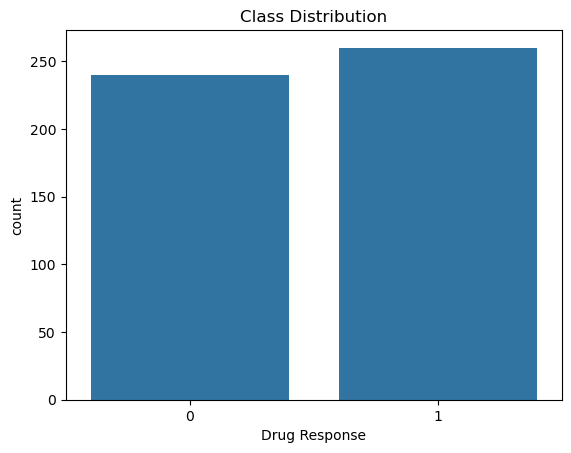

In [16]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()

#### Task 4: SVM Implementation
1. Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 2. Train SVM Model

In [18]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

#### 3. Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



#### Task 5: Visualization of SVM Results

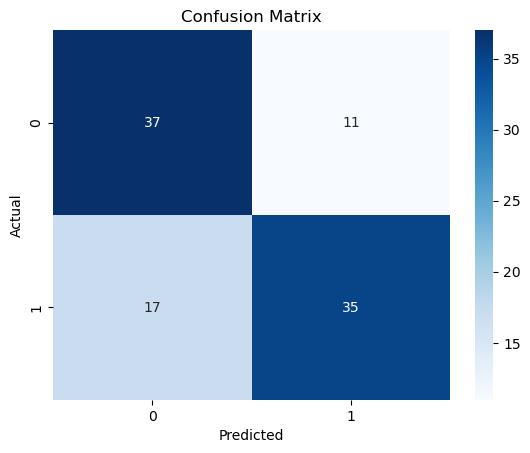

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Task 6: Parameter Tuning and Optimization

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [22]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73        48
           1       0.75      0.79      0.77        52

    accuracy                           0.75       100
   macro avg       0.75      0.75      0.75       100
weighted avg       0.75      0.75      0.75       100



#### Task 7: Comparison and Analysis
1. Kernel Comparison

In [23]:
kernels = ['linear', 'rbf', 'poly']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"Kernel: {k}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("-"*30)

Kernel: linear
Accuracy: 0.72
------------------------------
Kernel: rbf
Accuracy: 0.77
------------------------------
Kernel: poly
Accuracy: 0.65
------------------------------


#### 2. Strengths & Weaknesses of SVM

Strengths:

Works well on high-dimensional medical data

Effective for small-to-medium datasets

Strong theoretical foundation

Weaknesses:

Sensitive to feature scaling

Computationally expensive for large datasets

Kernel selection impacts performance

#### 3. Real-World Implications

Helps predict drug efficacy early

Supports personalized treatment plans

Reduces clinical trial cost and duration

Improves patient safety and success rates